In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('driver-data.csv')
df.head(3)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27


In [4]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

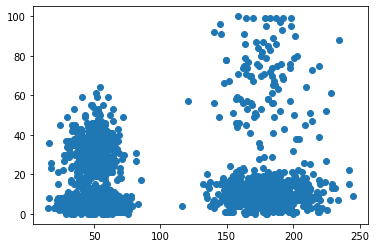

In [12]:
subset=df[['mean_dist_day', 'mean_over_speed_perc']]
plt.plot(subset['mean_dist_day'], subset['mean_over_speed_perc'], 'o')

In [13]:
res=[]
for each in range(2,10):
    kmeans=KMeans(n_clusters=each)
    kmeans.fit(subset)
    groups=kmeans.labels_
    score=silhouette_score(subset,groups)
    res.append((each,score))

In [14]:
res

[(2, 0.8490223286225532),
 (3, 0.8231396834167266),
 (4, 0.5911323766293183),
 (5, 0.5124644104428208),
 (6, 0.48552911418358147),
 (7, 0.4607268596313216),
 (8, 0.4504752396764536),
 (9, 0.44478265690423985)]

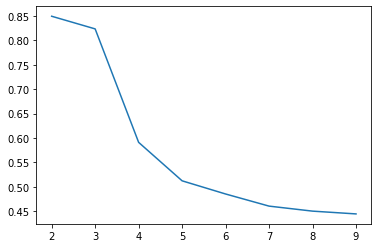

In [15]:
plt.plot(list(zip(*res))[0], list(zip(*res))[1])

In [ ]:
# Silhouette score is higher for 2 clusters.

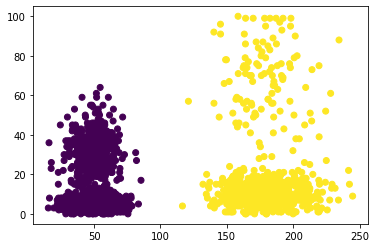

In [20]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(subset)
groups=kmeans.labels_
plt.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c=groups)

In [21]:
subset['DriversGrouping']=groups

In [26]:
subset.head(7)

,mean_dist_day,mean_over_speed_perc,DriversGrouping
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0
5,41.91,10,0
6,58.64,20,0


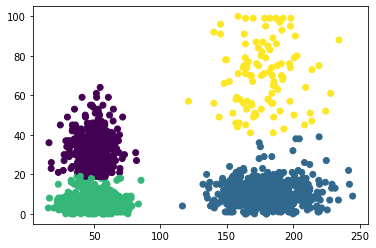

In [28]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(subset)
groups=kmeans.labels_
plt.scatter(df['mean_dist_day'], df['mean_over_speed_perc'], c=groups)